<a href="https://www.kaggle.com/lakshmanarajak/yoga-pose-classifier?scriptVersionId=89115827" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
     for filename in filenames:
         os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -Uqq fastbook #Installing Fastbook - Fast AI notebook

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
tensorflow 2.6.2 requires numpy~=1.19.2, but you have numpy 1.20.3 which is incompatible.
tensorflow 2.6.2 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.2 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.
tensorflow 2.6.2 requires wrapt~=1.12.1, but you have wrapt 1.13.3 which is incompatible.
tensorflow-transform 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tensorflow-transform 1.5.0 requires numpy<1.20,>=1.16, but you have numpy 1.20.3 which is incompatible.
tensorflow-transform 1.5.0 requires pyarrow<6,>=1, but you have p

In [3]:
 #Import all necessary libraries
    
from fastbook import *
import fastbook
# from fastai import * 
# from fastai.imports import *
from fastai.vision.widgets import * 

In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True #To avoid truncation error on damaged files

In [5]:
#Creating a Data Block with Image as i/p and Category as O/P for classifier

yoga = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  #Independent variable is image and Dependent is category
    get_items=get_image_files, # Getting all Image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Train and Validation split
    get_y=parent_label, # 
    item_tfms=Resize(128)) # Resize Transformation

In [6]:
#Importing all image files to train the model

path = '../input/yoga-dataset/DATASET/TRAIN' #Path('DATASET/TRAIN')
Path.BASE_PATH = path
fns = get_image_files(path)
fns #All list of files used to train the model

(#910) [Path('Side Plank/00000309.jpg'),Path('Side Plank/00000325.jpg'),Path('Side Plank/00000253.jpg'),Path('Side Plank/00000199.JPG'),Path('Side Plank/00000408.jpg'),Path('Side Plank/00000228.jpg'),Path('Side Plank/00000369.jpg'),Path('Side Plank/00000332.jpg'),Path('Side Plank/00000215.jpg'),Path('Side Plank/00000311.jpg')...]

In [7]:
#Dataload object initialization - Fast AI

dls = yoga.dataloaders(path) #Data Loader object

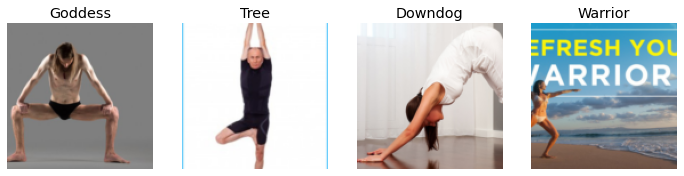

In [8]:
#To visualize files imported

dls.train.show_batch(max_n=4, nrows=1) #Samples from training set

In [9]:
#Doing necessary transformations on the input files

yoga = yoga.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5)) #Resizing images to 224*224
    ##batch_tfms=aug_transforms()) #Doing Augment Transformations
dls = yoga.dataloaders(path) #Re initialising Data Loaders

In [10]:
learn = cnn_learner(dls, resnet18, metrics=error_rate) # CNN learner - Transfer Learning
learn.fine_tune(4) # Fiting the model in Transfer learning 

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.266971,0.757484,0.302198,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.882070,0.438029,0.142857,00:18
1,0.655689,0.320142,0.115385,00:18
2,0.486932,0.299878,0.104396,00:19
3,0.381697,0.286986,0.098901,00:18


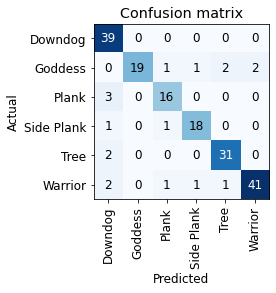

In [11]:
interp = ClassificationInterpretation.from_learner(learn) #Metrics
interp.plot_confusion_matrix() #To visualize errored images

In [12]:
learn.export() #Export the model to package

In [13]:

path = Path()
path.ls(file_exts='.pkl') #Path of the package

(#1) [Path('export.pkl')]

In [14]:
learn_inf = load_learner(path/'export.pkl') #Using the package for testing 

In [15]:
learn_inf.dls.vocab

['Downdog', 'Goddess', 'Plank', 'Side Plank', 'Tree', 'Warrior']

('Goddess', tensor(1), tensor([1.7994e-04, 8.8627e-01, 7.6995e-03, 2.3489e-03, 3.8613e-02, 6.4885e-02]))


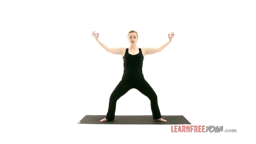

In [16]:
#Testing Goddess Pose
dest = '../input/yoga-dataset/DATASET/TEST/Goddess/00000029.jpg'
print ( learn_inf.predict(dest) )
im = Image.open(dest)
im.to_thumb(256,256)



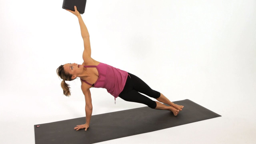

In [17]:
#Testing Side plank
dest = '../input/yoga-dataset/DATASET/TEST/Side Plank/00000015.jpg'
learn_inf.predict(dest)
im = Image.open(dest)
im.to_thumb(256,256)

('Tree', tensor(4), tensor([3.6910e-05, 2.2589e-03, 1.4109e-04, 1.4678e-03, 9.9595e-01, 1.4201e-04]))


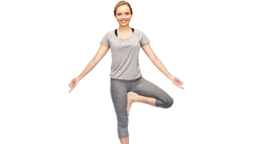

In [18]:
#Testing Tree Pose

dest = '../input/yoga-dataset/DATASET/TEST/Tree/00000017.jpg'
print ( learn_inf.predict(dest) )
im = Image.open(dest)
im.to_thumb(256,256)

('Plank', tensor(2), tensor([1.2534e-04, 1.7573e-05, 9.7846e-01, 2.8639e-04, 1.7911e-06, 2.1106e-02]))


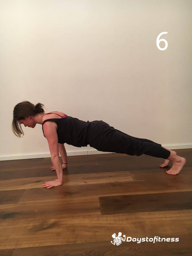

In [19]:
#Testing Plank Pose

dest = '../input/yoga-dataset/DATASET/TEST/Plank/00000017.jpg'
print ( learn_inf.predict(dest) )
im = Image.open(dest)
im.to_thumb(256,256)

('Downdog', tensor(0), tensor([1.0000e+00, 3.9432e-09, 9.8053e-07, 5.4271e-07, 2.8261e-08, 3.6962e-10]))


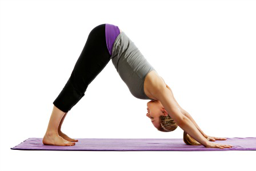

In [20]:
#Testing Downdog
dest = '../input/yoga-dataset/DATASET/TEST/Downdog/00000020.jpg'
print ( learn_inf.predict(dest) )
im = Image.open(dest)
im.to_thumb(256,256)